In [1]:
import numpy as np 
import pandas as pd

In [2]:
store = pd.read_csv("store.csv")
df = pd.read_csv("train.csv",parse_dates=[2])

/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# check store nan rows
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
# fillna in store with 0 has better result than median()
store.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
np.sum([df['Sales'] == 0])

154781

Text(0.5, 1.0, 'Store 10 Sales Distribution')

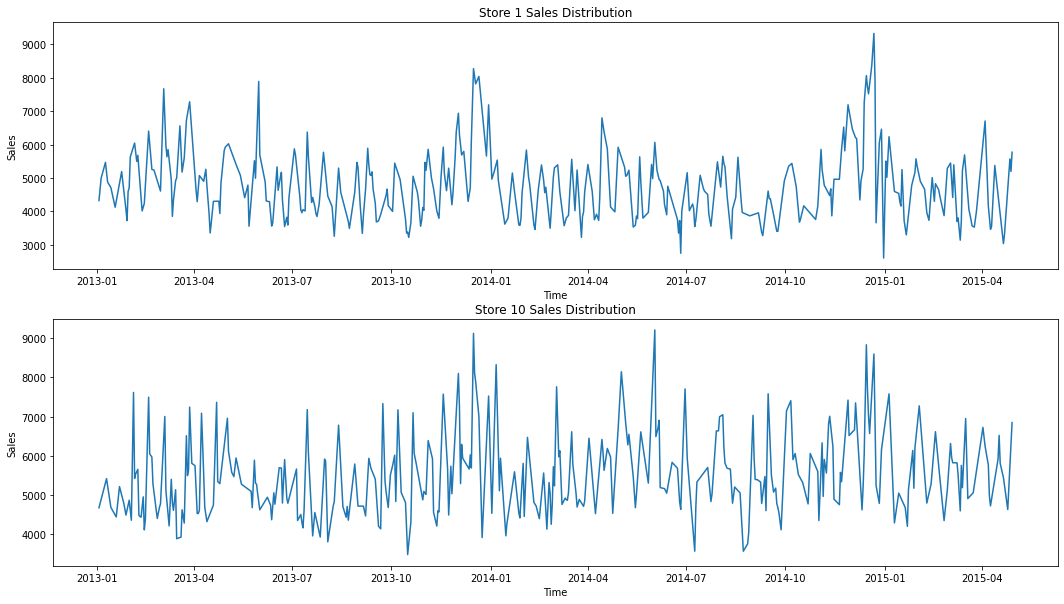

In [10]:
# Check some store sales values
import matplotlib.pyplot as plt
store_1 = df.loc[(df["Store"]==1)&(df['Sales']), ['Date',"Sales"]]
store_10 = df.loc[(df["Store"]==10)&(df['Sales']), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

In [11]:
# merge df with store 
merged = pd.merge(df, store, on='Store')
merged = merged.sort_values(['Date'],ascending = False)

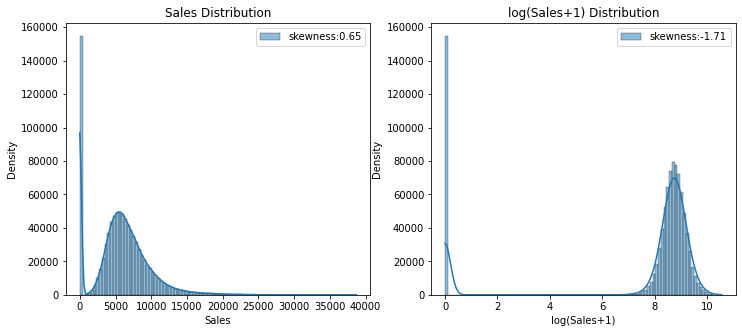

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# check distribution of sales in train set
# we have outliers, obviously if store is closed they will have 0 sales.
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.histplot(merged['Sales'],bins = 100, kde=True, label='skewness:{:.2f}'.format(merged['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.histplot(np.log1p(merged['Sales']), bins=100, kde=True,label='skewness:{:.2f}'.format(np.log1p(merged['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [13]:
# only use data of Sales>0 and Open is 1
merged = merged[(merged.Open != 0)&(merged.Sales >0)]

In [14]:
merged.loc[:,"StateHoliday"] = df.StateHoliday.apply(lambda x: '0' if x == 0 else x)
merged.StateHoliday.astype('category')
merged.Promo.astype('category')
merged.SchoolHoliday.astype('category')
merged.Store.astype('category')

0           1
312626    382
354136    433
259812    319
466056    569
         ... 
274261    335
289009    353
224251    274
211685    259
214235    262
Name: Store, Length: 759848, dtype: category
Categories (1115, int64): [1, 2, 3, 4, ..., 1112, 1113, 1114, 1115]

In [15]:
X = merged[['Date', 'Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear']  ]
Y = np.log1p(merged["Sales"])

In [16]:
X["Month"] = X.Date.dt.month
X["Year"] = X.Date.dt.year
X["Day"] = X.Date.dt.day
X['WeekOfYear'] = X.Date.dt.weekofyear
X.drop(columns = ['Date'], inplace=True)

/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rbenemerito/.virtualenvs/mynt/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [17]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
X.StoreType.replace(mappings, inplace=True)
X.Assortment.replace(mappings, inplace=True)
X.StateHoliday.replace(mappings, inplace=True)

In [18]:
# calculate competiter open time in months
X['CompetitionOpen'] = 12 * (X.Year - X.CompetitionOpenSinceYear) + \
    (X.Month - X.CompetitionOpenSinceMonth)
X['CompetitionOpen'] = X['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)

# calculate promo2 open time in months
X['PromoOpen'] = 12 * (X.Year - X.Promo2SinceYear) + \
    (X.WeekOfYear - X.Promo2SinceWeek) / 4.0
X['PromoOpen'] = X['PromoOpen'].apply(lambda x: x if x > 0 else 0)

In [19]:
# Use the last 25% of the data as a validation set
train_percentage = 0.25
train_size = int(df.shape[0] * train_percentage)

X_train = X[train_size:]
X_val = X[:train_size] 
y_train = Y[train_size:]
y_val = Y[:train_size]

In [20]:
X_train

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,CompetitionOpen,PromoOpen
910648,1111,1,1,0,1,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,8,2014,4,32,2.0,12.25
301845,369,1,1,0,1,4,3,5870.0,4.0,2014.0,0,0.0,0.0,8,2014,4,32,4.0,24176.00
669511,818,1,1,0,1,4,1,490.0,0.0,0.0,1,35.0,2010.0,8,2014,4,32,24176.0,47.25
647481,791,1,1,0,1,1,1,5950.0,4.0,2007.0,0,0.0,0.0,8,2014,4,32,88.0,24176.00
851656,1039,1,1,0,1,1,3,70.0,6.0,1990.0,1,22.0,2012.0,8,2014,4,32,290.0,26.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274261,335,2,0,0,1,2,1,90.0,0.0,0.0,1,31.0,2013.0,1,2013,1,1,24157.0,0.00
289009,353,2,0,0,1,2,2,900.0,0.0,0.0,1,14.0,2013.0,1,2013,1,1,24157.0,0.00
224251,274,2,0,0,1,2,2,3640.0,0.0,0.0,1,10.0,2013.0,1,2013,1,1,24157.0,0.00
211685,259,2,0,0,1,2,2,210.0,0.0,0.0,0,0.0,0.0,1,2013,1,1,24157.0,24156.25


In [21]:
# define eval metrics, metric used in kaggle
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [22]:
X_val

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,CompetitionOpen,PromoOpen
0,1,4,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,4,2015,30,18,79.0,24184.50
312626,382,4,1,0,0,3,3,26130.0,11.0,2002.0,0,0.0,0.0,4,2015,30,18,149.0,24184.50
354136,433,4,1,0,0,1,3,30030.0,11.0,2010.0,0,0.0,0.0,4,2015,30,18,53.0,24184.50
259812,319,4,1,0,0,1,3,570.0,9.0,2012.0,1,27.0,2012.0,4,2015,30,18,31.0,33.75
466056,569,4,1,0,0,1,1,1340.0,9.0,2006.0,0,0.0,0.0,4,2015,30,18,103.0,24184.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264331,324,1,1,0,1,1,1,13140.0,0.0,0.0,1,14.0,2011.0,8,2014,4,32,24176.0,40.50
804679,982,1,1,0,1,4,1,21930.0,0.0,0.0,0,0.0,0.0,8,2014,4,32,24176.0,24176.00
23517,29,1,1,0,1,4,3,2170.0,0.0,0.0,0,0.0,0.0,8,2014,4,32,24176.0,24176.00
211955,260,1,1,0,1,1,1,540.0,10.0,2011.0,0,0.0,0.0,8,2014,4,32,34.0,24176.00


In [23]:
import wandb
from wandb.xgboost import wandb_callback
wandb_config = {
    "Model": "RF Regressor"
}
wandb.init(project="mynt-rossmann",name="RF-2020-10-25")


wandb: Currently logged in as: rbenemerito (use `wandb login --relogin` to force relogin)


In [24]:
# try random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

clf = RandomForestRegressor(n_estimators = 20)
# clf = LinearRegression()
clf.fit(X_train, y_train)
# validation
y_pred = clf.predict(X_val)
rmspe_result = rmspe(np.expm1(y_val), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(rmspe_result))
rmse_result = mean_squared_error(np.expm1(y_val), np.expm1(y_pred), squared=False)
print('RMSE: {:.4f}'.format(rmse_result))
wandb.log({'RMSPE': rmspe_result, 'RMSE': rmse_result})

RMSPE: 0.2784
RMSE: 1280.1655


In [25]:
wandb.sklearn.plot_regressor(clf, X_train, X_val, y_train, y_val, 'RFRegressor')

wandb: 
wandb: Plotting RFRegressor.
wandb: Logged summary metrics.


KeyboardInterrupt: 

In [29]:
from joblib import dump, load
model_fname = 'RFRegressor-{:.3f}-{:.3f}.joblib'.format(rmspe_result,rmse_result)
dump(clf, model_fname) 
wandb.save(model_fname)

['wandb/run-20201025_180445-c8na9pzl/files/RFRegressor-0.278-1280.166.joblib',
 'wandb/run-20201025_180445-c8na9pzl/files/RFRegressor-0.278-1280.166.joblib']

Text(0.5, 1.0, 'Feature Importance')

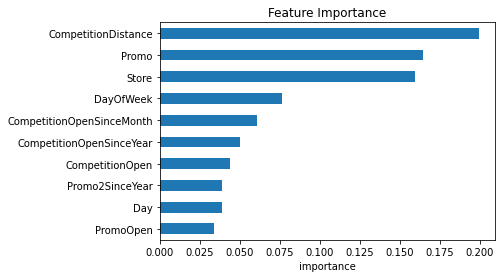

In [27]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [28]:
# Upload to wandb
data = [[label, val] for (label, val) in zip(X_train.columns, clf.feature_importances_)]
table = wandb.Table(data=data, columns = ["Feature", "Importance"])
wandb.log({"Feature Importance" : wandb.plot.bar(table, "Feature", "Importance", title="Feature Importance")})

In [ ]:
import xgboost as xgb

params = {"objective": "reg:squarederror", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, verbose_eval=True)

In [ ]:
# validation
y_pred = model.predict(xgb.DMatrix(x_valid))
# error = rmspe(np.expm1(y_valid), np.expm1(y_pred))

error = mean_squared_error(np.expm1(y_valid), np.expm1(y_pred), squared=False)
print('RMSPE: {:.4f}'.format(error))


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE: %f" % (rmse))